# IVAN FALCON MONZON

# MobileNetV2

Importación de librerías

In [2]:
# IVAN FALCON MONZON
# --- Importación de librerías ---
import tensorflow as tf # Importa TensorFlow, una biblioteca para construir y entrenar modelos de aprendizaje profundo.
from tensorflow.keras.models import Sequential # Importa la clase `Sequential` para construir modelos de aprendizaje profundo con capas apiladas linealmente.

from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
# - `Dense`: Capa completamente conectada.
# - `Dropout`: Reduce el sobreajuste desactivando aleatoriamente algunas neuronas durante el entrenamiento.
# - `Flatten`: Convierte matrices multidimensionales en un vector plano para conectarlas a capas densas.
# - `BatchNormalization`: Normaliza la salida de las capas para acelerar el entrenamiento y mejorar la estabilidad.

from tensorflow.keras.applications import MobileNetV2 # Importa el modelo preentrenado MobileNetV2, optimizado para dispositivos móviles y computación eficiente.

from tensorflow.keras.optimizers import Adam # Importa el optimizador Adam, que combina las ventajas de los métodos de optimización Adagrad y RMSprop.

from tensorflow.keras.preprocessing.image import ImageDataGenerator # Clase para aumentar datos de imágenes y preprocesarlas dinámicamente durante el entrenamiento.

from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
# - `ReduceLROnPlateau`: Reduce la tasa de aprendizaje automáticamente si no mejora la pérdida en el conjunto de validación.
# - `EarlyStopping`: Detiene el entrenamiento automáticamente cuando no hay mejora en las métricas especificadas.

import matplotlib.pyplot as plt # Biblioteca para graficar métricas de entrenamiento, como pérdida y precisión.

import numpy as np # Biblioteca para manipulación y cálculo eficiente con arreglos y matrices numéricas.

Configuración inicial **MobileNetV2**

🔹 Importante: Antes de ejecutar el código, asegúrate de cambiar la ruta del dataset en la variable DATASET_PATH para que el modelo pueda acceder correctamente a las imágenes.

⏳ Tiempo de ejecución: Este modelo ha sido entrenado aproximadamente 7 veces, con un tiempo estimado de 25 a 35 minutos para completar cada entrenamiento.

Found 442 images belonging to 6 classes.
Found 109 images belonging to 6 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 71s 6s/step - accuracy: 0.2471 - loss: 5.0795 - val_accuracy: 0.5872 - val_loss: 3.6426 - learning_rate: 1.0000e-04
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.4070 - loss: 4.3294 - val_accuracy: 0.6422 - val_loss: 3.5002 - learning_rate: 1.0000e-04
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 112s 6s/step - accuracy: 0.5699 - loss: 3.7506 - val_accuracy: 0.6789 - val_loss: 3.3807 - learning_rate: 1.0000e-04
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.6159 - loss: 3.5466 - val_accuracy: 0.6789 - val_loss: 3.3298 - learning_rate: 1.0000e-04
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 60s 6s/step - accuracy: 0.6973 - loss: 3.4486 - val_accuracy: 0.7615 - val_loss: 3.1709 - learning_rate: 1.0000e-04
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 0.7977 - loss: 3.0946 - val_accuracy

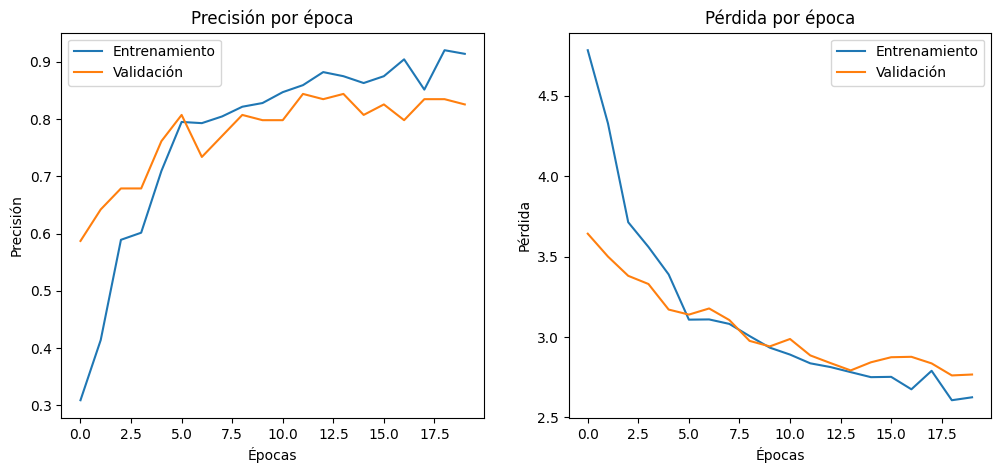

In [ ]:
# IVAN FALCON MONZÓN
# --- Configuración inicial ---
# Definimos las constantes iniciales
DATASET_PATH = '/content/drive/MyDrive/7PRO/EV2/Chess'  # Ruta del conjunto de datos de imágenes. # !IMPORTANTE¡ Cambiar esta ruta en donde tengamos el archivo con las imágenes.
IMG_HEIGHT, IMG_WIDTH = 160, 160  # Dimensiones de las imágenes (reducidas para mejorar velocidad). (Tamaño de las imágenes)
BATCH_SIZE = 32  # Cantidad de imágenes por lote durante el entrenamiento. (Tamaño del lote)
EPOCHS = 20  # Número de ciclos completos de entrenamiento (reducidos para optimizar tiempo). (Número de épocas)

# --- Habilitación de Mixed Precision ---
"""
--Mixed Precision
Habilitamos Mixed Precision para acelerar el entrenamiento utilizando cálculos en menor precisión (float16).
Esto es útil en GPUs modernas compatibles.
"""
from tensorflow.keras.mixed_precision import Policy, set_global_policy
policy = Policy('mixed_float16')  # Habilita cálculos en menor precisión (float16) para GPUs modernas.
set_global_policy(policy)

# --- Preprocesamiento de datos ---
"""
--Aumentación y normalización de datos
Utilizamos `ImageDataGenerator` para:
- Normalizar los valores de los píxeles al rango [0, 1].
- Aumentar el conjunto de datos mediante transformaciones como rotación, desplazamiento y volteo.
- Dividir el conjunto en entrenamiento (80%) y validación (20%).
"""
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normaliza los valores de los píxeles al rango [0, 1].
    validation_split=0.2,  # Divide el conjunto en entrenamiento (80%) y validación (20%).
    rotation_range=15,  # Rota aleatoriamente las imágenes hasta 15 grados.
    width_shift_range=0.1,  # Desplaza aleatoriamente las imágenes horizontalmente (10% del ancho).
    height_shift_range=0.1,  # Desplaza aleatoriamente las imágenes verticalmente (10% de la altura).
    horizontal_flip=True  # Voltea las imágenes horizontalmente de forma aleatoria.
)

# --- Generadores de datos ---
train_generator = train_datagen.flow_from_directory(
    DATASET_PATH,  # Ruta del conjunto de datos.
    target_size=(IMG_HEIGHT, IMG_WIDTH),  # Redimensiona las imágenes a las dimensiones definidas.
    batch_size=BATCH_SIZE,  # Tamaño de lote para el entrenamiento.
    class_mode='categorical',  # Clasificación multiclase.
    subset='training',  # Usa esta parte del conjunto para entrenar.
    shuffle=True  # Mezcla las imágenes aleatoriamente.
)

validation_generator = train_datagen.flow_from_directory(
    DATASET_PATH,  # Ruta del conjunto de datos.
    target_size=(IMG_HEIGHT, IMG_WIDTH),  # Redimensiona las imágenes para la validación.
    batch_size=BATCH_SIZE,  # Tamaño de lote para la validación.
    class_mode='categorical',  # Clasificación multiclase.
    subset='validation'  # Usa esta parte del conjunto para validar.
)

# --- Construcción del modelo ---
"""
--Modelo CNN basado en MobileNetV2
1. Usamos `MobileNetV2` como base preentrenada.
2. Congelamos las capas de la base para entrenar sólo las capas superiores.
3. Añadimos:
   - BatchNormalization para estabilizar el entrenamiento.
   - Dropout (0.5) y regularización L2 (0.01) para reducir el sobreajuste.
   - Una capa de salida con activación softmax para clasificación multiclase.
"""
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)) # `MobileNetV2`: Modelo preentrenado eficiente. `include_top=False` elimina las capas superiores para agregar personalización.
base_model.trainable = False  # Congela las capas preentrenadas para preservar el conocimiento inicial.

model = Sequential([
    base_model,  # Modelo base.
    BatchNormalization(),  # Normaliza las activaciones para estabilizar y acelerar el entrenamiento.
    Flatten(),  # Convierte las características 2D a un vector 1D.
    Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)), # Capa densa con 128 neuronas y regularización L2 para prevenir sobreajuste.
    Dropout(0.5),  # Apaga aleatoriamente el 50% de las neuronas para evitar sobreajuste.
    Dense(train_generator.num_classes, activation='softmax', dtype='float32') # Capa de salida para clasificar las imágenes en tantas clases como categorías haya.
])

# --- Compilación del modelo ---
"""
--Compilación
Optimizador: `Adam` con tasa de aprendizaje 0.0001.
Pérdida: `categorical_crossentropy` (clasificación multiclase).
Métrica: `accuracy` (precisión).
"""
optimizer = Adam(learning_rate=0.0001)  # Optimizador Adam con una tasa de aprendizaje ajustada.
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy']) # Se define la función de pérdida (categorical_crossentropy) y la métrica (precisión).

# --- Callbacks ---
"""
--Callbacks
- `ReduceLROnPlateau`: Reduce la tasa de aprendizaje si la pérdida de validación no mejora.
- `EarlyStopping`: Detiene el entrenamiento temprano si no hay mejora después de 5 épocas.
"""
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6, verbose=1)
# Reduce dinámicamente la tasa de aprendizaje cuando la pérdida de validación no mejora.
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
# Detiene el entrenamiento si la pérdida de validación no mejora tras 5 épocas.

# --- Entrenamiento ---
"""
--Entrenamiento
Entrenamos el modelo con los datos de entrenamiento y validación durante un máximo de 20 épocas.
"""
history = model.fit(
    train_generator,  # Datos de entrenamiento.
    steps_per_epoch=max(10, train_generator.samples // (5 * BATCH_SIZE)), # Limita el número de pasos por época para reducir el tiempo de entrenamiento.
    validation_data=validation_generator,  # Datos de validación.
    validation_steps=max(5, validation_generator.samples // (5 * BATCH_SIZE)), # Limita los pasos de validación por época.
    epochs=EPOCHS,  # Número de épocas definidas.
    callbacks=[reduce_lr, early_stop]  # Callbacks definidos anteriormente.
)

# --- Evaluación ---
"""
--Evaluación por clase
Calculamos la precisión para cada clase utilizando el conjunto de validación.
"""
eval_result = model.evaluate(validation_generator)
# Evalúa el modelo en los datos de validación.
print(f"\nTest Loss: {eval_result[0]:.4f}")  # Pérdida final en los datos de validación.
print(f"Test Accuracy: {eval_result[1]:.4f}")  # Precisión final en los datos de validación.

# --- Visualización ---
def plot_metrics(history):
    plt.figure(figsize=(12, 5))
    # Precisión
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Entrenamiento')
    plt.plot(history.history['val_accuracy'], label='Validación')
    plt.xlabel('Épocas')
    plt.ylabel('Precisión')
    plt.legend()
    plt.title('Precisión por época')

    # Pérdida
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Entrenamiento')
    plt.plot(history.history['val_loss'], label='Validación')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.legend()
    plt.title('Pérdida por época')
    plt.show()

plot_metrics(history)  # Grafica las métricas de precisión y pérdida.

🔹 Comportamiento del tiempo de ejecución:

 + Durante la ejecución del código, se puede observar que la primera época siempre tarda más tiempo, mientras que la segunda se ejecuta más rápido. Este patrón se repite de forma alterna, con una época más lenta seguida de otra más rápida.

⚠️ Parámetro clave a considerar:
+ EarlyStopping: Este callback detiene automáticamente el entrenamiento si no se detecta una mejora en la pérdida de validación después de 5 épocas consecutivas, evitando así un uso innecesario de recursos computacionales.

**Predicción de imágenes**

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


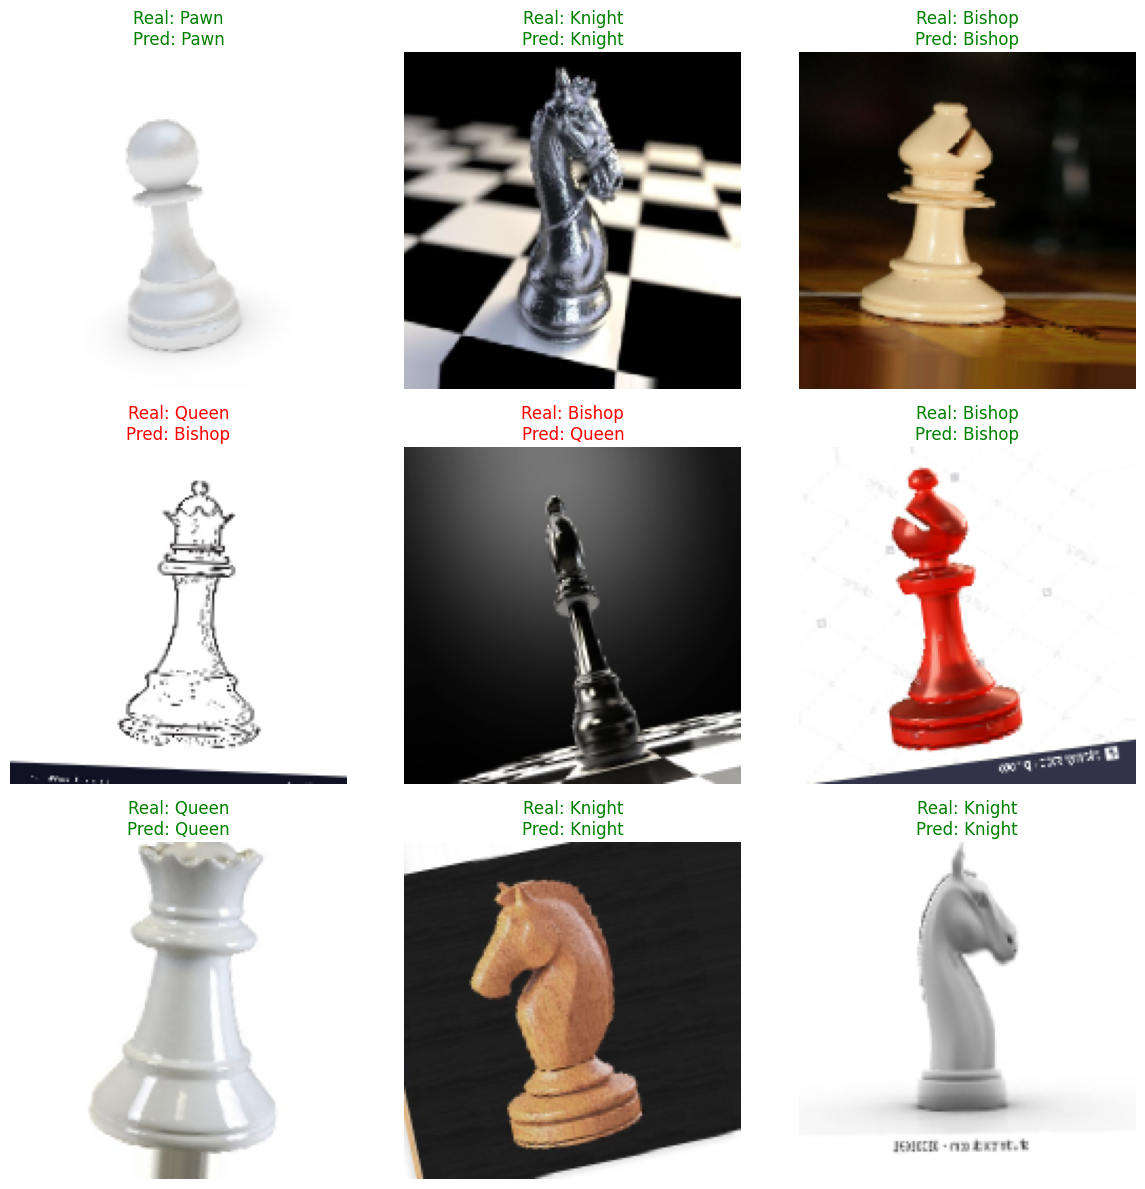

In [ ]:
# IVÁN FALCÓN MONZÓN
# --- Predicción visual de imágenes ---
def predict_and_visualize(generator, model, classes):
    # Obtener un lote de imágenes del generador
    x, y_true = next(generator)  # `x` es un lote de imágenes y `y_true` son las etiquetas verdaderas.

    predictions = model.predict(x)  # Realiza predicciones para el lote de imágenes.
    y_pred = np.argmax(predictions, axis=1)  # Convierte las predicciones de probabilidades en etiquetas de clase (índices).

    # Graficar las imágenes con sus etiquetas reales y predichas
    fig, axes = plt.subplots(3, 3, figsize=(12, 12))  # Crea una figura con una cuadrícula de 3x3 para mostrar imágenes.
    axes = axes.flatten()  # Aplana el arreglo de subgráficas para facilitar la iteración.

    for img, true_label, pred_label, ax in zip(x, y_true, y_pred, axes):
        ax.imshow(img)  # Muestra la imagen en la subgráfica correspondiente.

        real_class = classes[np.argmax(true_label)]  # Obtiene la clase real a partir de `y_true` (etiqueta verdadera).
        predicted_class = classes[pred_label]  # Obtiene la clase predicha a partir de `y_pred` (etiqueta predicha).

        # Establece el título de la subgráfica con la clase real y predicha, el color se pone verde si son iguales, rojo si no.
        ax.set_title(f"Real: {real_class}\nPred: {predicted_class}", color='green' if real_class == predicted_class else 'red')

        ax.axis('off')  # Desactiva los ejes para que solo se vean las imágenes.

    plt.tight_layout()  # Ajusta los márgenes de la figura para que las imágenes no se solapen.
    plt.show()  # Muestra la figura con las imágenes y sus predicciones.

# Obtener las clases desde el generador
class_indices = train_generator.class_indices  # Obtiene el diccionario de índices de clases del generador de datos.
classes = list(class_indices.keys())  # Extrae las clases (nombres de las categorías) en una lista.

# Llamar a la función de predicción visual
predict_and_visualize(validation_generator, model, classes)  # Llama a la función para predecir y mostrar las imágenes del conjunto de validación.

# Modelo EfficientNetB0

Configuración inicial **EfficientNetB0**

In [3]:
# --- Importación de librerías necesarias ---
import tensorflow as tf  # Framework de aprendizaje profundo para construir y entrenar modelos de redes neuronales
from tensorflow.keras.models import Sequential  # Modelo secuencial para apilar capas en orden
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization, GlobalAveragePooling2D
# - `Dense`: Capa totalmente conectada
# - `Dropout`: Previene sobreajuste eliminando aleatoriamente conexiones entre neuronas
# - `Flatten`: Convierte una matriz en un vector unidimensional (se sustituirá por GlobalAveragePooling2D)
# - `BatchNormalization`: Normaliza las activaciones en cada capa para estabilizar el entrenamiento
# - `GlobalAveragePooling2D`: Reduce la dimensionalidad de la salida convolucional sin usar Flatten

from tensorflow.keras.applications import EfficientNetB0  # Modelo preentrenado EfficientNetB0 para extracción de características
from tensorflow.keras.optimizers import Adam  # Optimizador Adam para actualizar los pesos del modelo
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Generador de imágenes con aumentación de datos
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
# - `ReduceLROnPlateau`: Reduce la tasa de aprendizaje si la validación deja de mejorar
# - `EarlyStopping`: Detiene el entrenamiento si la validación no mejora después de varias épocas

import matplotlib.pyplot as plt  # Librería para graficar métricas del modelo

# --- Configuración inicial del modelo ---
DATASET_PATH = '/content/drive/MyDrive/7PRO/EV2/Chess'  # Ruta del dataset de imágenes
IMG_HEIGHT, IMG_WIDTH = 224, 224  # Tamaño de las imágenes de entrada (mejor para EfficientNetB0)
BATCH_SIZE = 32  # Número de imágenes que se procesan en cada paso de entrenamiento
EPOCHS = 15  # Número total de épocas de entrenamiento

# --- Aumentación de datos para mejorar la generalización del modelo ---
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normaliza los valores de píxeles entre [0,1]
    validation_split=0.2,  # 80% para entrenamiento, 20% para validación
    rotation_range=45,  # Rotaciones aleatorias de hasta 45 grados
    width_shift_range=0.4,  # Desplazamiento horizontal de hasta 40% del ancho
    height_shift_range=0.4,  # Desplazamiento vertical de hasta 40% de la altura
    shear_range=0.3,  # Transformación de cizallamiento para distorsionar imágenes
    zoom_range=0.5,  # Zoom aleatorio de hasta 50%
    brightness_range=[0.6, 1.4],  # Variaciones en el brillo
    horizontal_flip=True  # Voltea horizontalmente las imágenes
)

# --- Generadores de datos (carga en tiempo real) ---
train_generator = train_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_HEIGHT, IMG_WIDTH),  # Redimensiona las imágenes al tamaño especificado
    batch_size=BATCH_SIZE,  # Tamaño del lote de entrenamiento
    class_mode='categorical',  # Se usa para clasificación multiclase
    subset='training'  # Separa el conjunto de entrenamiento
)

validation_generator = train_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_HEIGHT, IMG_WIDTH),  # Redimensiona las imágenes para validación
    batch_size=BATCH_SIZE,  # Tamaño del lote para validación
    class_mode='categorical',  # Clasificación multiclase
    subset='validation'  # Separa el conjunto de validación
)

# --- Construcción del modelo ---
# Se usa EfficientNetB0 como extractor de características
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
base_model.trainable = False  # Se congela el modelo base para reutilizar sus pesos preentrenados

# Se define el modelo final agregando capas adicionales
model = Sequential([
    base_model,  # Modelo EfficientNetB0 como extractor de características
    GlobalAveragePooling2D(),  # Reduce la dimensionalidad de las características extraídas (mejor que Flatten)
    BatchNormalization(),  # Normaliza las activaciones para evitar oscilaciones en el aprendizaje
    Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.005)),
    # - Capa densa con 128 neuronas
    # - Activación ReLU para no linealidad
    # - Regularización L2 para reducir sobreajuste
    Dropout(0.4),  # Desactiva aleatoriamente el 40% de las conexiones para evitar sobreajuste
    Dense(train_generator.num_classes, activation='softmax')  # Capa de salida con activación softmax para clasificación
])

# --- Compilación del modelo ---
optimizer = Adam(learning_rate=1e-4)  # Optimizador Adam con tasa de aprendizaje de 0.0001
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
# - `categorical_crossentropy`: Función de pérdida para clasificación multiclase
# - `accuracy`: Métrica de evaluación

# --- Callbacks para optimización del entrenamiento ---
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6, verbose=1)
# Reduce la tasa de aprendizaje si la pérdida en validación deja de mejorar

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
# Detiene el entrenamiento si la validación no mejora después de 5 épocas, restaurando los mejores pesos

# --- Entrenamiento del modelo ---
history = model.fit(
    train_generator,  # Datos de entrenamiento
    steps_per_epoch=train_generator.samples // BATCH_SIZE,  # Número de pasos por época
    validation_data=validation_generator,  # Datos de validación
    validation_steps=validation_generator.samples // BATCH_SIZE,  # Pasos de validación por época
    epochs=EPOCHS,  # Número total de épocas
    callbacks=[reduce_lr, early_stop]  # Callbacks para optimizar el entrenamiento
)

# --- Evaluación del modelo ---
eval_result = model.evaluate(validation_generator)
print(f"\nTest Loss: {eval_result[0]:.4f}")  # Muestra la pérdida final en test
print(f"Test Accuracy: {eval_result[1]:.4f}")  # Muestra la precisión final en test

Found 442 images belonging to 6 classes.
Found 109 images belonging to 6 classes.
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 197s 10s/step - accuracy: 0.2113 - loss: 3.1043 - val_accuracy: 0.1354 - val_loss: 2.9496 - learning_rate: 1.0000e-04
Epoch 2/15
 1/13 ━━━━━━━━━━━━━━━━━━━━ 43s 4s/step - accuracy: 0.2188 - loss: 2.9852

/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 141ms/step - accuracy: 0.2188 - loss: 2.9852 - val_accuracy: 0.1538 - val_loss: 2.9451 - learning_rate: 1.0000e-04
Epoch 3/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 66s 4s/step - accuracy: 0.2026 - loss: 3.0143 - val_accuracy: 0.1667 - val_loss: 2.9425 - learning_rate: 1.0000e-04
Epoch 4/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.1250 - loss: 3.0351 - val_accuracy: 0.3077 - val_loss: 2.9363 - learning_rate: 1.0000e-04
Epoch 5/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 89s 4s/step - accuracy: 0.1696 - loss: 3.0245 - val_accuracy: 0.1562 - val_loss: 2.9349 - learning_rate: 1.0000e-04
Epoch 6/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.2188 - loss: 2.9909 - val_accuracy: 0.3846 - val_loss: 2.9336 - learning_rate: 1.0000e-04
Epoch 7/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 55s 4s/step - accuracy: 0.1802 - loss: 3.0125 - val_accuracy: 0.1667 - val_loss: 2.9279 - learning_rate: 1.0000e-04
Epoch 8/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.1875 - loss: 2.938

**Predicción de imágenes**

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


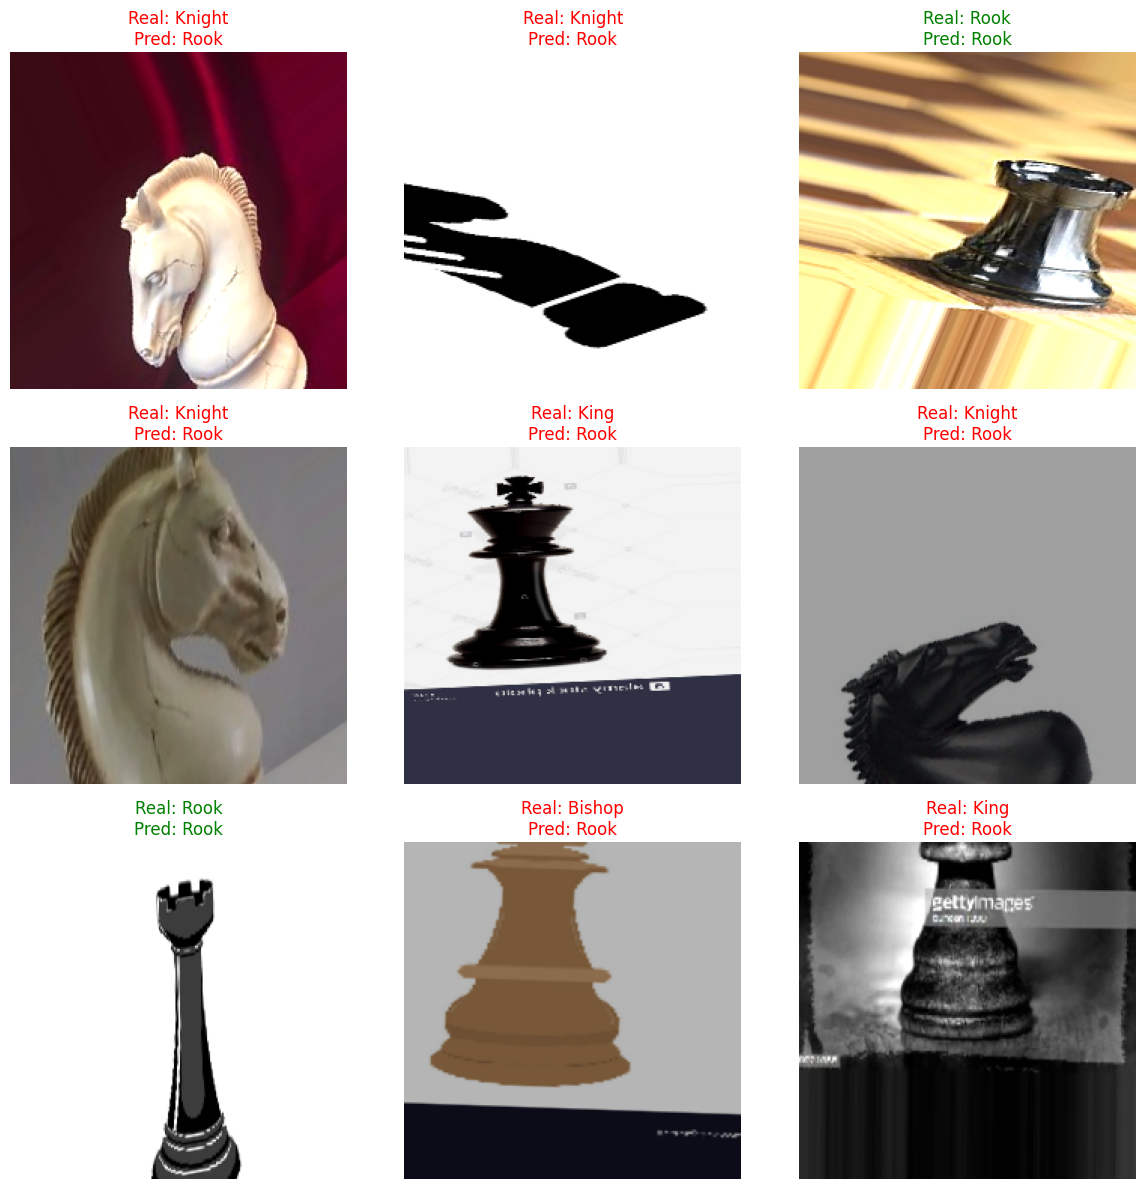

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def predict_and_visualize(generator, model, classes):
    # Obtener un lote de imágenes del generador
    x, y_true = next(generator)  # `x`: imágenes, `y_true`: etiquetas reales

    # Convertir imágenes al formato correcto para visualizar
    x = (x * 255).astype("uint8")  # Escalar de [0,1] a [0,255] y convertir a uint8

    predictions = model.predict(x / 255.0)  # Normalizar antes de predecir
    y_pred = np.argmax(predictions, axis=1)  # Obtener la clase predicha

    # Graficar las imágenes con etiquetas reales y predichas
    fig, axes = plt.subplots(3, 3, figsize=(12, 12))  # Cuadrícula de 3x3
    axes = axes.flatten()

    for img, true_label, pred_label, ax in zip(x, y_true, y_pred, axes):
        ax.imshow(img)  # Mostrar imagen corregida
        real_class = classes[np.argmax(true_label)]  # Clase real
        predicted_class = classes[pred_label]  # Clase predicha

        # Título con colores (verde si es correcto, rojo si es incorrecto)
        ax.set_title(f"Real: {real_class}\nPred: {predicted_class}",
                     color='green' if real_class == predicted_class else 'red')
        ax.axis('off')  # Desactiva los ejes

    plt.tight_layout()  # Ajusta los márgenes
    plt.show()

# Obtener las clases desde el generador
class_indices = train_generator.class_indices  # Índices de las clases
classes = list(class_indices.keys())  # Lista de nombres de las clases

# Mostrar predicciones visuales con la corrección
predict_and_visualize(validation_generator, model, classes)


# Concluciones

🔴 Conclusión:

EfficientNetB0 no es adecuado para tu dataset en su configuración actual.
MobileNetV2 está funcionando mucho mejor (82.57% de precisión).

⚠️ Posibles razones del mal rendimiento:

1. El dataset es muy pequeño (442 imágenes de entrenamiento y 109 de validación).
 * EfficientNetB0 es un modelo más grande que necesita más datos para aprender bien.
 * MobileNetV2, al ser más ligero, se adapta mejor a datasets pequeños.

2. El modelo no está extrayendo bien las características.

 * Puede que EfficientNetB0 esté sobreajustándose a las primeras capas sin captar información relevante.

3. El entrenamiento no es estable.
 * SGD con momentum no está ayudando en datasets pequeños.
 * Adam funcionó mejor en MobileNetV2, pero aquí EfficientNetB0 sigue fallando.